# Sensor Based Activity Recoginition 
Challenge: cdl1 - Sensor based Activity Recognition  
Team: Lea Bütler, Manjavy Kirupa, Etienne Roulet, Si Ben Tran  

Aufgabe: DL Modell erstellen

Hier in diesem Notebook erstellen wir unsere Deep Learning Modelle.

In [10]:
import tensorflow as tf
print(tf.config.list_physical_devices())
tf.debugging.set_log_device_placement(False)


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [11]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\python311\lib\site-packages (1.2.1)




[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:

import logging
from datetime import datetime
# datetime as filename for logging
now = datetime.now()
date_time_string = now.strftime("%Y-%m-%d_%H-%M-%S")

logging.basicConfig(level=logging.INFO, filename = f"{date_time_string}.txt", filemode='a')

In [2]:

from dataclasses import dataclass

@dataclass
class Parameters():
    batch_size: int = 128
    epochs: int = 10
    verbosity: int = 1
    step_size: int = 374
    number_folds: int = 2
    output_size: int = 6
    

In [3]:
# Loading Data
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection as ms

# read the CSV file into a DataFrame
df = pd.read_csv("Alle_Messungen_trimmed.csv")
df.head(1)

,Unnamed: 0,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,1,2023-02-27 15:02:17.156,0.0,9.722,1.278,0.0,0.0,0.0,0.0,0.0,0.0,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


In [4]:
df = df.drop(columns=["id", "user", "id_combined"])
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# get all types of the df
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].astype('int64')//1e9
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])


In [58]:
df.head()

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,class
0,1.677510e+09,0.000,9.722,1.278,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.21775,-0.719579,0.631111,0
1,1.677510e+09,-0.728,9.779,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.42065,0.568356,-0.598058,0
2,1.677510e+09,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,43.5,-13.143750,0.00000,0.000000,0.000000,0
3,1.677510e+09,0.000,0.000,0.000,0.0,0.0,0.0,-13.012501,0.0,20.587502,0.00000,0.000000,0.000000,0
4,1.677510e+09,0.000,0.000,0.000,0.0,0.0,0.0,-22.612501,0.0,20.268751,0.00000,0.000000,0.000000,0


In [17]:
def factors(n):
    result = set()
    for i in range(1, int(n**0.5) + 1):
        div, mod = divmod(n, i)
        if mod == 0:
            result |= {i, div}
    return result


In [28]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Set the window size and step size
import numpy as np

# Set the window size and step size
window_size = 5
step_size = 1

# Reshape X to 2D format (samples, features)
X = df.values[:, 1:13]

# Define y
y = df["class"].values

# Create a sliding window of X with the specified window and step sizes
X_windows = np.array([X[i:i+window_size,:] for i in range(0,X.shape[0]-window_size+1,step_size)])

# Reshape X_windows to 3D format (samples, timesteps, features)
timesteps = X_windows.shape[1]
n_features = X_windows.shape[2]
X_windows = X_windows.reshape(-1, timesteps, n_features)

# Create the corresponding y labels for the sliding windows
y_windows = np.array([y[i+window_size-1] for i in range(0,X.shape[0]-window_size+1,step_size)])
y_windows = to_categorical(y_windows, num_classes=6)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)


In [15]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2559982, 12),
 (2559982,),
 (2047946, 50, 12),
 (2047946, 6),
 (511987, 50, 12),
 (511987, 6))

In [19]:
#X_train, X_test, y_train, y_test = ms.train_test_split(df.values[:, 1:13], df.values[:, 13], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

#dataset = tf.data.Dataset.from_tensor_slices((df.values[:, 1:13], df.values[:, 13]))

In [29]:
# Template
import tensorflow as tf
from sklearn.model_selection import KFold
import numpy as np
import dataclasses

# Load data and preprocess
# split train dataset into x_train and y_train
x_train = X_train
x_test = X_test
y_train = y_train
y_test = y_test
    

# Something like this as first Model
def create_model_1():
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu', input_shape=(12,)),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
            tf.keras.layers.Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
    return model


# Something like this as second Model
def create_model_2():
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((-1, 12), input_shape=(12,)),
        tf.keras.layers.Conv1D(32, 5, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Conv1D(16, 3, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
    return model

# Something like this as Third Model
def create_model_3():
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((-1, 12), input_shape=(12,)),
        tf.keras.layers.Conv1D(32, 5, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Conv1D(16, 3, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
    return model

def create_model_4():
    model = tf.keras.Sequential([
        # Add a 1D convolutional layer
        tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', padding='same', input_shape=(timesteps, n_features)),
        
        # Add LSTM layer
        tf.keras.layers.LSTM(100),

        # Add a dense output layer
        tf.keras.layers.Dense(6, activation='softmax')  # Change activation function based on the nature of the output
    ])
    model.compile(optimizer='adam',   loss='categorical_crossentropy', metrics=['accuracy'])  # Change the loss function based on the nature of the output
    return model

best_model_history = None  # Keep track of the best model's history
model_histories = []
# Perform cross-validation
models = [create_model_4]
best_model = None
num_folds = Parameters.number_folds
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_acc_scores = []

for i, (train, test) in enumerate(kfold.split(x_train, y_train)):
    logging.info(f'Fold {i+1}')
    train_x, train_y = x_train[train], y_train[train]
    test_x, test_y = x_train[test], y_train[test]
    
    fold_histories = []

    
    for j, model_creator in enumerate(models):
        model = model_creator()
        logging.info(f'Model {j+1}')
        history = model.fit(train_x, train_y, epochs=Parameters.epochs, batch_size=Parameters.batch_size, validation_data=(test_x, test_y), verbose=Parameters.verbosity)
        test_loss, acc = model.evaluate(test_x, test_y, verbose=Parameters.verbosity)
        logging.info(f'Validation accuracy: {acc}')
        
        fold_histories.append(history.history)
        
        for epoch in range(Parameters.epochs):
            # Log accuracy after each epoch
            acc_epoch = history.history['val_accuracy'][epoch]
            logging.info(f'Epoch {epoch + 1}, Validation accuracy: {acc_epoch}')
        fold_acc_scores.append((i, j, acc))
        
        if best_model_history is None or acc > best_model_acc:
            best_model_history = history
            best_model = model  # Store the trained model instance
            best_model_acc = acc
    
    model_histories.append(fold_histories)

# Find the best model
best_model_index = np.argmax([score[2] for score in fold_acc_scores])
best_fold_idx, best_model_idx, _ = max(fold_acc_scores, key=lambda x: x[2])
best_model_history = model_histories[best_fold_idx][best_model_idx]


#ogging.info(fold_acc_scores)
#logging.info(best_model_index)
#(best_fold, best_model_index, best_model_acc) = fold_acc_scores[best_model_index]
#best_model = models[best_model_index]
#logging.info(f'fold acc score: {fold_acc_scores}')
#logging.info(f'Best model is model {best_model_index+1}')

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(x_test, y_test)
logging.info(f'Test accuracy {test_acc}')

Epoch 1/10
8000/8000 [==============================] - 135s 17ms/step - loss: 0.2576 - accuracy: 0.9118 - val_loss: 0.1463 - val_accuracy: 0.9507
Epoch 2/10
8000/8000 [==============================] - 142s 18ms/step - loss: 0.1263 - accuracy: 0.9574 - val_loss: 0.1106 - val_accuracy: 0.9630
Epoch 3/10
8000/8000 [==============================] - 139s 17ms/step - loss: 0.0975 - accuracy: 0.9667 - val_loss: 0.0946 - val_accuracy: 0.9681
Epoch 4/10
8000/8000 [==============================] - 142s 18ms/step - loss: 0.0820 - accuracy: 0.9719 - val_loss: 0.0837 - val_accuracy: 0.9718
Epoch 5/10
8000/8000 [==============================] - 138s 17ms/step - loss: 0.0730 - accuracy: 0.9750 - val_loss: 0.0765 - val_accuracy: 0.9742
Epoch 6/10
8000/8000 [==============================] - 140s 17ms/step - loss: 0.0660 - accuracy: 0.9773 - val_loss: 0.0677 - val_accuracy: 0.9774
Epoch 7/10
8000/8000 [==============================] - 137s 17ms/step - loss: 0.0614 - accuracy: 0.9788 - val_loss: 0

In [11]:
model_histories

[[{'loss': [0.25841471552848816,
    0.12553001940250397,
    0.09597323834896088,
    0.08062659204006195,
    0.07203102111816406,
    0.06582358479499817,
    0.06090965121984482,
    0.05767214298248291,
    0.0544605627655983,
    0.052263833582401276],
   'accuracy': [0.9108312726020813,
    0.957246720790863,
    0.9673668742179871,
    0.9724216461181641,
    0.9754450917243958,
    0.9773992300033569,
    0.9791306853294373,
    0.9801199436187744,
    0.9812400937080383,
    0.9819119572639465],
   'val_loss': [0.15033113956451416,
    0.1128445416688919,
    0.0869276225566864,
    0.0823303759098053,
    0.07902760803699493,
    0.07179480046033859,
    0.06543990969657898,
    0.06706825643777847,
    0.05982617288827896,
    0.06749038398265839],
   'val_accuracy': [0.9484702348709106,
    0.9626950025558472,
    0.9705886244773865,
    0.9724187254905701,
    0.9733044505119324,
    0.9757781028747559,
    0.9785457253456116,
    0.9775867462158203,
    0.980170726776123

In [26]:

import matplotlib.pyplot as plt
import numpy as np

print(best_model_history['loss'])
# summarize history for accuracy
plt.plot(best_model_history['accuracy'])
plt.plot(best_model_history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(best_model_history['loss'])
plt.plot(best_model_history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

TypeError: 'NoneType' object is not subscriptable

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
# Create a Baseline Model

In [ ]:
# Yvo
df_yvo = pd.read_csv("Yvo_Messung_Velo.csv")
df_yvo = df_yvo.drop(columns=["id", "user", "id_combined"])
df_yvo.drop(['Unnamed: 0'], axis=1, inplace=True)
# get all types of the df
df_yvo['time'] = pd.to_datetime(df['time'])
df_yvo['time'] = df_yvo['time'].astype('int64')//1e9

window_size = 5
step_size = 1

# Reshape X to 2D format (samples, features)
X = df_yvo.values[:, 1:13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = best_model.predict(X_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [64]:
# Reshape X to 2D format (samples, features)

X = df_yvo.values[:, 1:13]
print(X)


# Create a sliding window of X with the specified window and step sizes
X_windows = np.array([X[i:i+window_size,:] for i in range(0,X.shape[0]-window_size+1,step_size)])

# Reshape X_windows to 3D format (samples, timesteps, features)
timesteps = X_windows.shape[1]
n_features = X_windows.shape[2]
print(n_features)
X_windows = X_windows.reshape(-1, timesteps, n_features)

# Create the corresponding y labels for the sliding windows

# Split the dataset into training and testing sets

y_pred = best_model.predict(X_windows)

[[-0.2554014694036916 0.0627739246252924 -0.068917468881607 ...
  0.0241107369990773 -0.0168847335445076 -0.955092131987144]
 [-0.648255526189506 -0.2549644296932965 -0.1621072092324495 ...
  0.0240223349667984 -0.0167318289707819 -0.954951742041129]
 [-0.3446060491085052 -0.1319966600637883 -0.2441407647967338 ...
  0.0247001870844381 -0.0167058077282564 -0.954835088892052]
 ...
 [3.7737110214784737 1.30152245080024 -1.0938228264331815 ...
  -0.2965141152758624 0.0537645161008005 -0.6393428096786451]
 [3.4788784725815054 1.4988500264957547 -0.9363555519610642 ...
  -0.3032294463855013 0.0590262027053206 -0.6485499191743929]
 [3.3580855627730486 1.5443082938566803 -0.5835130049049854 ...
  -0.3098368620703562 0.063513684254773 -0.6581362936520376]]
12


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [65]:
df_yvo['time'] = pd.to_datetime(df['time'])
df_yvo['time'] = df_yvo['time'].astype('int64')//1e9


In [68]:

df_yvo['time'] = df_yvo['time'].astype('int64')//1e9
df_yvo.head(100)

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,class
0,0.0,-0.255401,0.062774,-0.068917,-0.060281,-0.086030,0.122743,-20.240265,14.888126,-45.427979,0.024111,-0.016885,-0.955092,Velofahren
1,0.0,-0.648256,-0.254964,-0.162107,-0.010253,0.068555,0.066702,-20.279266,14.997738,-45.587585,0.024022,-0.016732,-0.954952,Velofahren
2,0.0,-0.344606,-0.131997,-0.244141,0.080815,0.189325,0.060628,-20.084534,14.874027,-45.695648,0.024700,-0.016706,-0.954835,Velofahren
3,0.0,-0.108857,-0.059905,-0.767689,0.243680,0.251499,0.070379,-19.931274,14.768127,-45.841370,0.026031,-0.017140,-0.954689,Velofahren
4,0.0,-0.026243,0.051545,-1.267084,0.402980,0.217648,0.060937,-19.975128,14.635101,-46.086731,0.027690,-0.018361,-0.954529,Velofahren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.486918,-1.994945,0.285918,1.898905,0.541021,-0.117545,19.109344,38.572220,-31.641296,0.593289,0.337320,-0.650030,Velofahren
96,0.0,0.857179,-2.566238,0.452565,1.784690,0.615688,-0.008192,19.217743,38.056293,-31.995117,0.591982,0.330516,-0.651260,Velofahren
97,0.0,0.786069,-3.395395,0.661277,1.634128,0.538407,0.151720,19.217743,38.056293,-31.995117,0.591037,0.323713,-0.652460,Velofahren
98,0.0,1.329055,-3.588824,0.892727,1.393255,0.509532,0.365632,19.510803,37.516296,-32.750549,0.590502,0.317059,-0.653815,Velofahren


In [ ]:
# Compare Baseline vs best_model


In [ ]:
# plot graph for learning curve and loss curve from baseline and best_model

In [29]:
# summarise best model
best_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 64)             1600      
                                                                 
 lstm_1 (LSTM)               (None, 100)               66000     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 68,206
Trainable params: 68,206
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# print loss and accuracy for best model over epoch and steps plot

In [ ]:
y_pred = model.predict(X_test)

16000/16000 [==============================] - 10s 603us/step


In [ ]:
model.evaluate(X_test, y_test)

16000/16000 [==============================] - 11s 710us/step - loss: 0.2796 - accuracy: 0.9057


[0.27957311272621155, 0.9057142734527588]

In [36]:
# plot a confusion matrix for not mulitclass classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = best_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.show()

16000/16000 [==============================] - 14s 880us/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

16000/16000 [==============================] - 21s 1ms/step


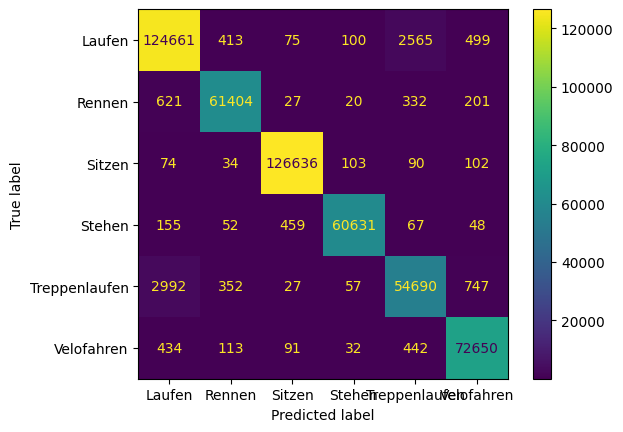

array([0.96918173, 0.98267626, 0.99574609, 0.99106698, 0.93446446,
       0.98169706])

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#for multiclass classification
y_pred = best_model.predict(x_test)
y_test_labels = y_test.argmax(axis=1)
y_pred_labels = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# get f1 score of each class
from sklearn.metrics import f1_score
f1 = f1_score(y_test_labels, y_pred_labels, average=None)
# get f1 score of each class

disp.plot()
plt.show()
display(f1)

In [ ]:
# Export Model for using in tensorflow.js
!mkdir -p saved_model
best_model.save('saved_model/sensor_model')
best_model.save('saved_model/sensor_model.h5')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/sensor_model\assets


In [ ]:
# Save the weight for the Js Model
best_model.save_weights('./checkpoints/my_checkpoint')


In [ ]:
# upload model to server to download it on tensorflow js

In [ ]:
dill.dump_session('notebook_env.db')

NameError: name 'dill' is not defined